In [1]:
#conda v 22.9.0
#Python v 3.9.12
import numpy as np # v. 1.21.5
import sklearn # v. 0.0
import pandas as pd # v. 1.4.2

import matplotlib.pyplot as plt # v. 3.5.1
import statsmodels.api as sm # v. 0.13.2
import pandas as pd #v. 1.4.2
import pmdarima as pm #v. 2.0.3
import sweetviz as sv #v. 2.2.1
import warnings as ww 
import statsmodels.tsa.stattools as stattools # v. 0.13.2
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # v. 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v. 0.13.2
from statsmodels.tsa.arima_model import ARIMA # v. 0.13.2

from sklearn.model_selection import train_test_split # v. 0.0
from sklearn.metrics import mean_absolute_error # v. 0.0
from sklearn.metrics import mean_squared_error # v. 0.0
from sklearn.metrics import mean_absolute_percentage_error # v. 0.0
from sklearn.linear_model import LogisticRegression # v. 0.0
from sklearn.metrics import accuracy_score, precision_score, recall_score # v. 0.0
from sklearn.metrics import confusion_matrix # v. 0.0
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # v. 0.0
from sklearn.metrics import roc_auc_score, roc_curve # v. 0.0
from sklearn.preprocessing import LabelBinarizer # v. 0.0
from sklearn.utils import resample, shuffle # v. 0.0
from imblearn.over_sampling import SMOTE # v. 0.11.0


ww.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/colejennings/Downloads/loan_default_data_set.csv') #read in the data

In [3]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [4]:
df.columns, df.shape, df.dtypes #20,000 rows, 21 columns

(Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 (20000, 21),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [5]:
df.isna().sum() #pct_card_over_50_uti = 1958 missing values, rep_income = 1559 missing values, rep_education = 1 mis

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

In [6]:
df['rep_education'].value_counts()
#replace nulls with "college" since it is the mode of rep_education
df['rep_education'].fillna('college', inplace=True)

In [7]:
# Calculate the median 
median_pct_card_over_50_uti = df['pct_card_over_50_uti'].median()
median_rep_income = df['rep_income'].median()


# Replace null values with the respective medians
df['pct_card_over_50_uti'].fillna(median_pct_card_over_50_uti, inplace=True)
df['rep_income'].fillna(median_rep_income, inplace=True)

In [8]:
df.isna().sum() #replaced all null values successfully

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

In [9]:
df['Def_ind'].value_counts(normalize = True) #check class distribution

0    0.9
1    0.1
Name: Def_ind, dtype: float64

In [10]:
df = pd.get_dummies(df, columns=['rep_education'], prefix=['education']) #create dummy variables for all education levels

In [11]:
# Step 1: Split your data into two separate datasets for minority and majority class
X_minority = df[df['Def_ind'] == 1]  # Your minority class data
X_majority = df[df['Def_ind'] == 0]  # Your majority class data

# Step 2: Determine the desired number of observations for each class
length_minority = len(X_minority)
length_majority = len(X_majority)


oversampled_minority = resample(X_minority, random_state=5, n_samples = length_majority, replace = True)
#concatenate this with X_majority

undersampled_majority = resample(X_majority, random_state=5, n_samples = length_minority, replace = True)
#concatenate this with X_minority



In [12]:
OVS = pd.concat([oversampled_minority, X_majority], ignore_index=True) #creat oversampled dataset

In [13]:
OVS.shape, OVS.columns, OVS.dtypes #36000 rows, 24 cols

((36000, 24),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'Def_ind',
        'education_college', 'education_graduate', 'education_high_school',
        'education_other'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_curr

In [14]:
OVS['Def_ind'].value_counts(normalize = True) #data is balanced

1    0.5
0    0.5
Name: Def_ind, dtype: float64

In [15]:
#EDA on new dataset
report1 = sv.analyze(OVS)
report1.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
OVS_X = OVS.loc[:, ~OVS.columns.isin(['Def_ind', 'rep_education'])] #select features
OVS_y = OVS[['Def_ind']]
#Drop rep_education which resolves value error

In [17]:
OVS_X.columns #confirm it worked

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'education_college',
       'education_graduate', 'education_high_school', 'education_other'],
      dtype='object')

In [18]:
OVS_X_train, OVS_X_test, OVS_y_train, OVS_y_test = train_test_split(OVS_X, OVS_y, test_size = 0.3, random_state = 4)
#create training and test sets on oversampled dataset

In [19]:
model = LogisticRegression(solver = 'saga', max_iter = 10000) #create log regression model class

In [20]:
model.fit(OVS_X_train, OVS_y_train) #fit on training set

LogisticRegression(max_iter=10000, solver='saga')

In [21]:
OVS_y_Pred = model.predict(OVS_X_test) #predict on test set

In [22]:
OVS_accuracy = accuracy_score(OVS_y_test, OVS_y_Pred) #calculate accuracy
OVS_precision = precision_score(OVS_y_test, OVS_y_Pred, average = 'weighted')#weighted average takes into account class distribution in the dataset
OVS_recall = recall_score(OVS_y_test, OVS_y_Pred, average = 'weighted')#weighted average takes into account class distribution in the dataset


In [23]:
print("Accuracy:", OVS_accuracy)
print("Precision:", OVS_precision)
print("Recall:", OVS_recall)
#accuracy = .65, precision = .66, recall = .65

Accuracy: 0.6513888888888889
Precision: 0.6624780942801842
Recall: 0.6513888888888889


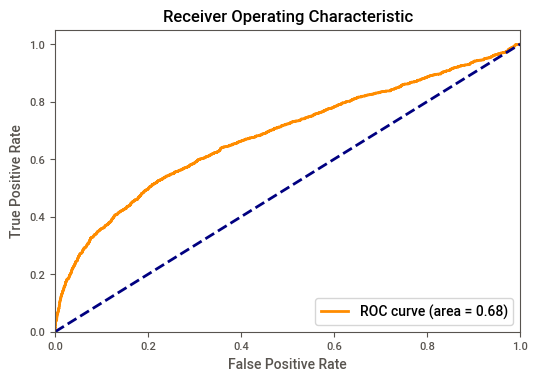

In [24]:
#Get predicted prob for positive class
OVS_y_prob = model.predict_proba(OVS_X_test)[:,1]

#Calculate ROC Curve
OVSfpr, OVStpr, OVSthreshold = roc_curve(OVS_y_test, OVS_y_prob)

#Calculate the Area Under the Curve
OVSroc_auc = roc_auc_score(OVS_y_test, OVS_y_prob)

#Plot the ROC curve
plt.figure()
plt.plot(OVSfpr, OVStpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % OVSroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
#ROC Curve area = 0.66

In [25]:
UDS = pd.concat([undersampled_majority, X_minority], ignore_index=True) #create undersampled dataset

In [26]:
UDS.shape, UDS.columns, UDS.dtypes #4000 columns, makes sense

((4000, 24),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'Def_ind',
        'education_college', 'education_graduate', 'education_high_school',
        'education_other'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_curre

In [27]:
UDS['Def_ind'].value_counts(normalize = True) #data is balanced

0    0.5
1    0.5
Name: Def_ind, dtype: float64

In [28]:
#EDA on new dataset
report2 = sv.analyze(UDS)
report2.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
UDS_X = UDS.loc[:, ~UDS.columns.isin(['Def_ind', 'rep_education'])] #select features
UDS_y = UDS[['Def_ind']]
#Drop rep_education which resolves value error

In [30]:
UDS_X.columns #confirm it worked

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'education_college',
       'education_graduate', 'education_high_school', 'education_other'],
      dtype='object')

In [31]:
UDS_X_train, UDS_X_test, UDS_y_train, UDS_y_test = train_test_split(UDS_X, UDS_y, test_size = 0.3, random_state = 4)
#create training and test sets on undersampled dataset

In [32]:
model.fit(UDS_X_train, UDS_y_train) #fit on training set

LogisticRegression(max_iter=10000, solver='saga')

In [33]:
UDS_y_Pred = model.predict(UDS_X_test) #predict on test set

In [34]:
UDS_accuracy = accuracy_score(UDS_y_test, UDS_y_Pred) #calculate accuracy
UDS_precision = precision_score(UDS_y_test, UDS_y_Pred, average = 'weighted')#weighted average takes into account class distribution in the dataset
UDS_recall = recall_score(UDS_y_test, UDS_y_Pred, average = 'weighted')#weighted average takes into account class distribution in the dataset


In [35]:
print("Accuracy:", UDS_accuracy)
print("Precision:", UDS_precision)
print("Recall:", UDS_recall)
#accuracy = .64, precision = .65, recall = .64

Accuracy: 0.6408333333333334
Precision: 0.6515978289528878
Recall: 0.6408333333333334


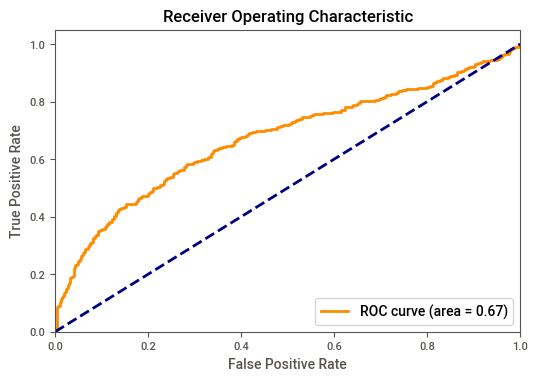

In [36]:
#Get predicted prob for positive class
UDS_y_prob = model.predict_proba(UDS_X_test)[:,1]

#Calculate ROC Curve
UDSfpr, UDStpr, UDSthreshold = roc_curve(UDS_y_test, UDS_y_prob)

#Calculate the Area Under the Curve
UDSroc_auc = roc_auc_score(UDS_y_test, UDS_y_prob)

#Plot the ROC curve
plt.figure()
plt.plot(UDSfpr, UDStpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % UDSroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
#ROC Curve area = 0.67

In [37]:
sm = SMOTE(random_state=42) #use smote function

In [38]:
df_x = df.loc[:, ~df.columns.isin(['Def_ind', 'rep_education'])] #select features
df_y = df[['Def_ind']]
#Drop rep_education which resolves value error

In [39]:
X_res, y_res = sm.fit_resample(df_x, df_y) #join these two together before concatenating
#concatenate with X_majority

In [40]:
smoteoversample = pd.DataFrame(X_res, columns = df_x.columns) #create smote dataset
smoteoversample['Def_ind'] = y_res #joined x and y and concatenated it with oversampled df

In [41]:
smoteoversample['Def_ind'].value_counts(normalize = True) #data is balanced

0    0.5
1    0.5
Name: Def_ind, dtype: float64

In [42]:
smoteoversample.shape, smoteoversample.columns, smoteoversample.dtypes #oversample worked I have 36000 rows

((36000, 24),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'education_college',
        'education_graduate', 'education_high_school', 'education_other',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_curr

In [43]:
#EDA on new dataset
report = sv.analyze(smoteoversample)
report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
#Fit model on smote dataset
SM_X = smoteoversample.drop(['Def_ind'], axis=1) #Exclude dependent variable
SM_y = smoteoversample['Def_ind'] #select dependent variable

In [45]:
SM_X_train, SM_X_test, SM_y_train, SM_y_test = train_test_split(SM_X, SM_y, test_size = 0.3, random_state = 4)
#create training and test sets on smote dataset

In [46]:
model.fit(SM_X_train, SM_y_train) #fit on training set

LogisticRegression(max_iter=10000, solver='saga')

In [47]:
SM_y_Pred = model.predict(SM_X_test) #predict on test set

In [48]:
SM_accuracy = accuracy_score(SM_y_test, SM_y_Pred) #calculate accuracy
SM_precision = precision_score(SM_y_test, SM_y_Pred, average = 'weighted')#weighted average takes into account class distribution in the dataset
SM_recall = recall_score(SM_y_test, SM_y_Pred, average = 'weighted')#weighted average takes into account class distribution in the dataset


In [49]:
print("Accuracy:", SM_accuracy)
print("Precision:", SM_precision)
print("Recall:", SM_recall)
#accuracy = .65, precision = .66, recall = .65

Accuracy: 0.6513888888888889
Precision: 0.663690719214347
Recall: 0.6513888888888889


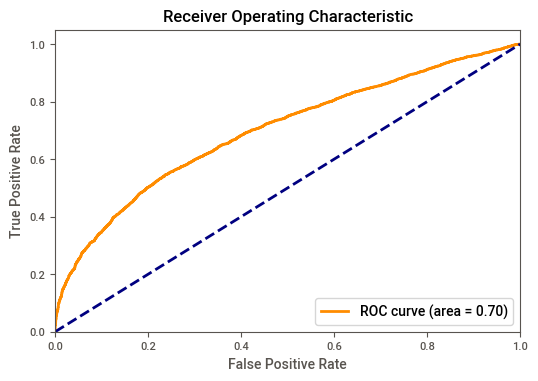

In [50]:
#Get predicted prob for positive class
SM_y_prob = model.predict_proba(SM_X_test)[:,1]

#Calculate ROC Curve
SMfpr, SMtpr, SMthreshold = roc_curve(SM_y_test, SM_y_prob)

#Calculate the Area Under the Curve
SMroc_auc = roc_auc_score(SM_y_test, SM_y_prob)

#Plot the ROC curve
plt.figure()
plt.plot(SMfpr, SMtpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % SMroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
#ROC Curve area = 0.70

In [51]:
#Based on both the metrics (accuracy, precision, and recall) as well as the AUC, I would prefer the SMOTE model. SMOTE's AUC was .7, which was larger than 
# Oversampled's AUC of .66 and Undersampled's AUC of .67. SMOTE's accuracy = .65, precision = .66, and recall = .65.
# SMOTE's metrics were higher-performing than Oversampled (OVS), and Undersampled (UDS), respectively.